In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
chicago = pd.read_csv('/content/drive/MyDrive/final_csv/crime.csv')

In [4]:
chicago.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'geometry', 'Community Area Name', 'F_Date', 'Time',
       'High Risk Area', 'Hour', 'Weekday', 'Month',
       'Dist_to_Nearest_HighRisk', 'min_distance_to_police',
       'Offense Level Median', 'Offense Level Class', 'Quarter',
       'LocCrime_ArrestRate'],
      dtype='object')

### feature 조합1

In [5]:
features = ['Year', 'Month', 'Primary Type', 'Description', 'Community Area', 'Latitude', 'Longitude', 'Offense Level Median', 'Dist_to_Nearest_HighRisk','min_distance_to_police']

target = 'Arrest'

In [6]:
ml_data = chicago[features + [target]].copy()

In [7]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le_dict = {}
for col in features:
    if ml_data[col].dtype == 'object':
        le = LabelEncoder()
        ml_data[col] = le.fit_transform(ml_data[col])
        le_dict[col] = le

In [8]:
# X, y 분리
X_data = ml_data.drop(columns=[target])
y_data = ml_data[target]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.3,
                                                    stratify=y_data,
                                                    random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 모델 생성
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# 모델 학습
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [11]:
# 예측
y_pred = rf_model.predict(X_test)

# 평가 지표 출력
print("정확도 (Accuracy):", accuracy_score(y_test, y_pred))
print("\n분류 보고서 (Classification Report):\n", classification_report(y_test, y_pred))
print("\n혼동 행렬 (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))

정확도 (Accuracy): 0.8872356929233243

분류 보고서 (Classification Report):
               precision    recall  f1-score   support

       False       0.89      0.96      0.93   1852521
        True       0.86      0.67      0.75    630481

    accuracy                           0.89   2483002
   macro avg       0.88      0.81      0.84   2483002
weighted avg       0.89      0.89      0.88   2483002


혼동 행렬 (Confusion Matrix):
 [[1782241   70280]
 [ 209714  420767]]


### feature 조합2 + SMOTE 오버샘플링

In [6]:
features = [
    'Year', 'Month', 'Primary Type',
    'Description', 'Community Area',
    'Latitude', 'Longitude', 'Offense Level Median',
    'Dist_to_Nearest_HighRisk','min_distance_to_police',
    'Location Description'

]

target = 'Arrest'

In [7]:
ml_data2 = chicago[features + [target]].copy()

In [8]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le_dict = {}
for col in features:
    if ml_data2[col].dtype == 'object':
        le = LabelEncoder()
        ml_data2[col] = le.fit_transform(ml_data2[col])
        le_dict[col] = le

In [9]:
# X, y 분리
X_data = ml_data2.drop(columns=[target])
y_data = ml_data2[target]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.3,
                                                    stratify=y_data,
                                                    random_state=42)

In [11]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [18]:
from collections import Counter

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_resampled))

Before SMOTE: Counter({False: 4322548, True: 1471122})
After SMOTE: Counter({False: 4322548, True: 4322548})


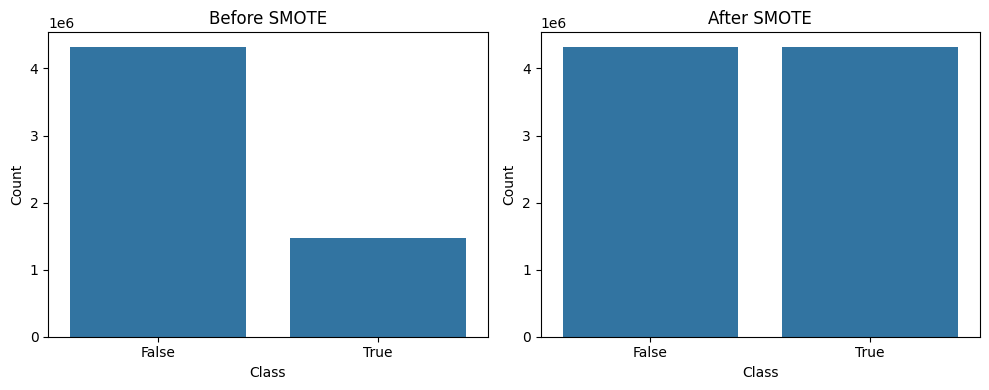

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data 준비
before = pd.Series(y_train).value_counts().sort_index()
after = pd.Series(y_resampled).value_counts().sort_index()

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(x=before.index, y=before.values, ax=axes[0])
axes[0].set_title("Before SMOTE")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")

sns.barplot(x=after.index, y=after.values, ax=axes[1])
axes[1].set_title("After SMOTE")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 모델 생성
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# 모델 학습
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [21]:
# 예측
y_pred = rf_model.predict(X_test)

# 평가 지표 출력
print("정확도 (Accuracy):", accuracy_score(y_test, y_pred))
print("\n분류 보고서 (Classification Report):\n", classification_report(y_test, y_pred))
print("\n혼동 행렬 (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))

정확도 (Accuracy): 0.8759505630684148

분류 보고서 (Classification Report):
               precision    recall  f1-score   support

       False       0.90      0.93      0.92   1852521
        True       0.78      0.71      0.74    630481

    accuracy                           0.88   2483002
   macro avg       0.84      0.82      0.83   2483002
weighted avg       0.87      0.88      0.87   2483002


혼동 행렬 (Confusion Matrix):
 [[1727020  125501]
 [ 182514  447967]]


| 모델                     | SMOTE 적용 | Accuracy | Precision (체포) | Recall (체포) | F1-Score (체포) |
|--------------------------|-------------|----------|------------------|----------------|-----------------|
| Random Forest (Before)   | ❌ No        | 0.8902   | 0.90             | 0.64           | 0.75            |
| Random Forest (After)    | ✅ Yes       | 0.8760   | 0.78             | 0.71           | 0.74            |

► 해석 및 비교

**정확도(Accuracy)**는 SMOTE 적용 전이 더 높지만, 이는 다수 클래스(비체포)의 비율이 높기 때문에 생긴 착시일 수 있음.

**Recall(체포)**은 SMOTE 이후 0.64 → 0.71로 향상됨 → 즉, 체포된 사건을 더 잘 잡아냄.

**Precision(체포)**은 다소 낮아졌지만, 균형을 맞춘 F1-score는 큰 차이 없음 (0.75 → 0.74).

결론적으로 SMOTE를 적용하면 소수 클래스인 '체포'에 대한 민감도(재현율)가 증가하여 불균형 문제를 보완할 수 있으며, 실제 상황에서 체포를 놓치지 않는 것이 중요하다면 SMOTE 모델이 더 유의미할 수 있음.

하지만 precision 0.90 -> 0.78은 꽤나 커보임 f1-score에 중점을 두고 보겠음

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 아주 최소한의 탐색 범위
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 20],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    scoring='f1',
    cv=2,
    verbose=2
)

grid.fit(X_resampled, y_resampled)

# 최적 모델
best_model = grid.best_estimator_

# 평가
from sklearn.metrics import classification_report
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
# 평가 지표 출력
print("정확도 (Accuracy):", accuracy_score(y_test, y_pred))
print("\n분류 보고서 (Classification Report):\n", classification_report(y_test, y_pred))
print("\n혼동 행렬 (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))

-> 램 부족으로 다운.. 더 범위를 줄여야 함

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_model_best_guess = RandomForestClassifier(
    n_estimators=100,         # 충분한 트리 수 (기본값 유지)
    max_depth=20,             # 과적합 방지 + 깊이 조절
    min_samples_split=5,      # 노드 분할 최소 샘플 수 증가
    min_samples_leaf=2,       # 리프 노드 최소 샘플 수 증가 (일반화 ↑)
    class_weight='balanced',  # 클래스 불균형 보정
    random_state=42,
    n_jobs=-1
)

rf_model_best_guess.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=2, min_samples_split=5, n_jobs=-1,
                       random_state=42)

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf_model_best_guess.predict(X_test)

print("정확도 (Accuracy):", accuracy_score(y_test, y_pred))
print("\n분류 보고서:\n", classification_report(y_test, y_pred))
print("\n혼동 행렬:\n", confusion_matrix(y_test, y_pred))

정확도 (Accuracy): 0.8741547529965743

분류 보고서:
               precision    recall  f1-score   support

       False       0.91      0.92      0.92   1852521
        True       0.76      0.74      0.75    630481

    accuracy                           0.87   2483002
   macro avg       0.84      0.83      0.83   2483002
weighted avg       0.87      0.87      0.87   2483002


혼동 행렬:
 [[1705366  147155]
 [ 165319  465162]]


### 하이퍼파라미터 조정

In [15]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=10,
                       n_jobs=-1, random_state=42)

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf_model.predict(X_test)

print("정확도 (Accuracy):", accuracy_score(y_test, y_pred))
print("\n분류 보고서:\n", classification_report(y_test, y_pred))
print("\n혼동 행렬:\n", confusion_matrix(y_test, y_pred))

정확도 (Accuracy): 0.8711994593641085

분류 보고서:
               precision    recall  f1-score   support

       False       0.91      0.92      0.91   1852521
        True       0.75      0.73      0.74    630481

    accuracy                           0.87   2483002
   macro avg       0.83      0.83      0.83   2483002
weighted avg       0.87      0.87      0.87   2483002


혼동 행렬:
 [[1700091  152430]
 [ 167382  463099]]


In [18]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=25, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf_model.predict(X_test)

print("정확도 (Accuracy):", accuracy_score(y_test, y_pred))
print("\n분류 보고서:\n", classification_report(y_test, y_pred))
print("\n혼동 행렬:\n", confusion_matrix(y_test, y_pred))

정확도 (Accuracy): 0.8779094821510414

분류 보고서:
               precision    recall  f1-score   support

       False       0.91      0.93      0.92   1852521
        True       0.78      0.73      0.75    630481

    accuracy                           0.88   2483002
   macro avg       0.84      0.83      0.84   2483002
weighted avg       0.88      0.88      0.88   2483002


혼동 행렬:
 [[1718933  133588]
 [ 169563  460918]]


In [20]:
# 모델 생성
rf_model = RandomForestClassifier(
    n_estimators=150,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1
)

# 학습
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       n_estimators=150, n_jobs=-1, random_state=42)

In [21]:
y_pred = rf_model.predict(X_test)

print("정확도 (Accuracy):", accuracy_score(y_test, y_pred))
print("\n분류 보고서:\n", classification_report(y_test, y_pred))
print("\n혼동 행렬:\n", confusion_matrix(y_test, y_pred))

정확도 (Accuracy): 0.878736706615621

분류 보고서:
               precision    recall  f1-score   support

       False       0.91      0.93      0.92   1852521
        True       0.78      0.72      0.75    630481

    accuracy                           0.88   2483002
   macro avg       0.85      0.83      0.84   2483002
weighted avg       0.88      0.88      0.88   2483002


혼동 행렬:
 [[1726064  126457]
 [ 174640  455841]]
